In [251]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import cupy
from itertools import product

from datetime import datetime

from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [252]:
df = pd.read_csv("cleaned_data.csv")

In [253]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tweets,Marketcap,Proportion Traded
0,2018-08-21,6301.069824,6500.870117,6298.240234,6488.759766,6488.759766,3.377180e+09,33425.0,1.104058e+11,0.030589
1,2018-08-22,6486.250000,6816.790039,6310.109863,6376.709961,6376.709961,4.668110e+09,32026.0,1.135271e+11,0.041119
2,2018-08-23,6371.339844,6546.540039,6371.339844,6534.879883,6534.879883,3.426180e+09,33815.0,1.110094e+11,0.030864
3,2018-08-24,6551.520020,6719.959961,6498.640137,6719.959961,6719.959961,4.097820e+09,29804.0,1.131099e+11,0.036229
4,2018-08-25,6719.950195,6789.629883,6700.959961,6763.189941,6763.189941,3.312600e+09,26122.0,1.159731e+11,0.028564


In [254]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Tweets',
       'Marketcap', 'Proportion Traded'],
      dtype='object')

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1097 non-null   object 
 1   Open               1097 non-null   float64
 2   High               1097 non-null   float64
 3   Low                1097 non-null   float64
 4   Close              1097 non-null   float64
 5   Adj Close          1097 non-null   float64
 6   Volume             1097 non-null   float64
 7   Tweets             1095 non-null   float64
 8   Marketcap          1097 non-null   float64
 9   Proportion Traded  1097 non-null   float64
dtypes: float64(9), object(1)
memory usage: 85.8+ KB


In the data cleaning script, we did not see any null values as perhaps the empty cell was labelled as a "null" string rather than a null value. 

In [256]:
print(df.isnull().sum())

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Tweets               2
Marketcap            0
Proportion Traded    0
dtype: int64


Hence, we will interpolate the missing value using a linear method. 

In [257]:
df.interpolate(method ='linear', limit_direction ='forward', inplace= True)

In [258]:
print(df.isnull().sum())

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Tweets               0
Marketcap            0
Proportion Traded    0
dtype: int64


# Data Exploration

In [259]:
trace1 = go.Scatter(
    x = df['Date'],
    y = df['Open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = df['Date'],
    y = df['Close'].astype(float),
    mode = 'lines',
    name = 'Close'
)

layout = dict(
    title='Historical Bitcoin Prices (2018-2021) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [260]:
trace1 = go.Scatter(
    x = df['Date'],
    y = df['Tweets'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)

layout = dict(
    title='Historical Bitcoin Tweets (2018-2021) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [261]:
trace1 = go.Scatter(
    x = df['Date'],
    y = df['Proportion Traded'].astype(float),
    mode = 'lines',
    name = 'Bitcoin Price (Open)'
)

layout = dict(
    title='Historical Proportion of Bitcoin Traded Daily (USD) (2018-2021) with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [262]:
df.Date = pd.to_datetime(df.Date)
# Unix-time to 
df.Date = pd.to_datetime(df.Date, unit = 'D')

In [263]:
df.index = df.Date
# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

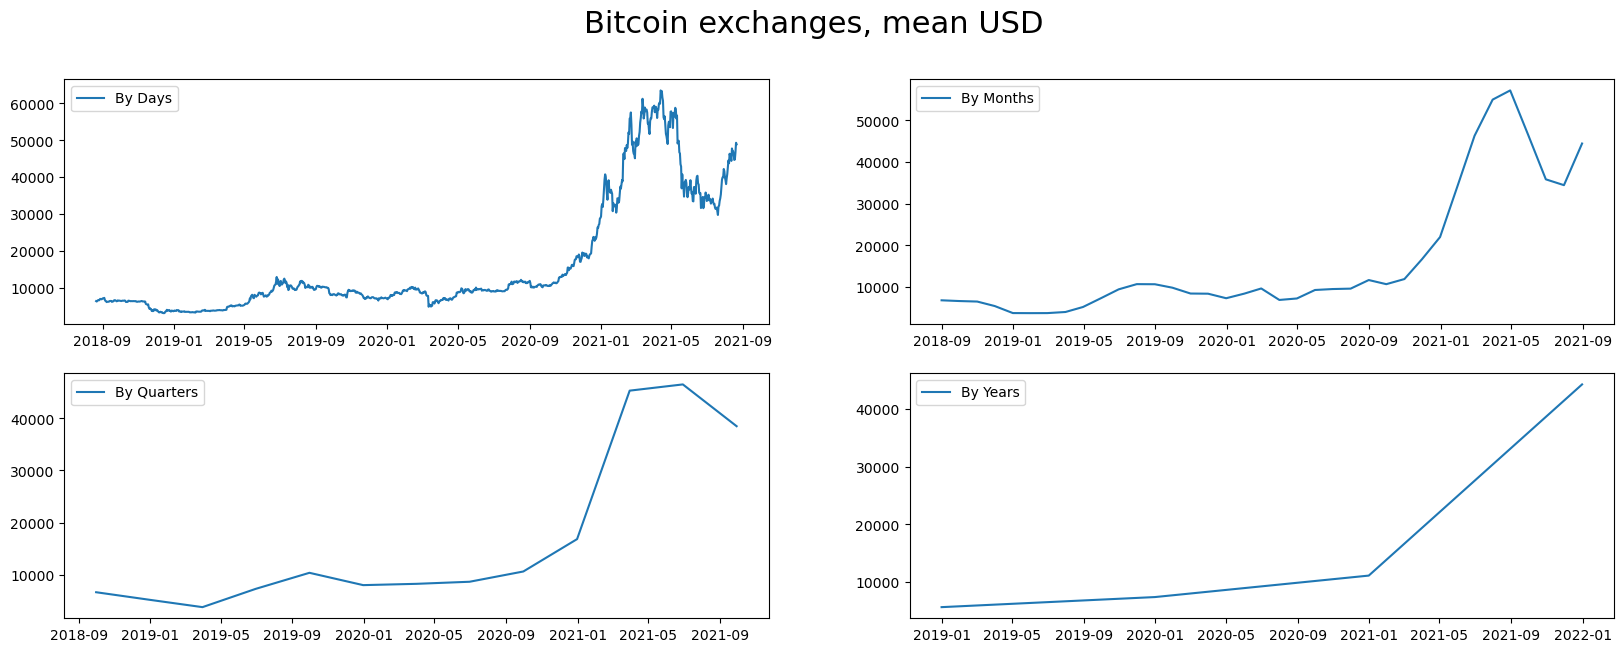

In [264]:
# PLOTS
fig = plt.figure(figsize=[20, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df['Adj Close'], '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month['Adj Close'], '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q['Adj Close'], '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year['Adj Close'], '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

Let us predict prices by month to dictate a seasonal trend:

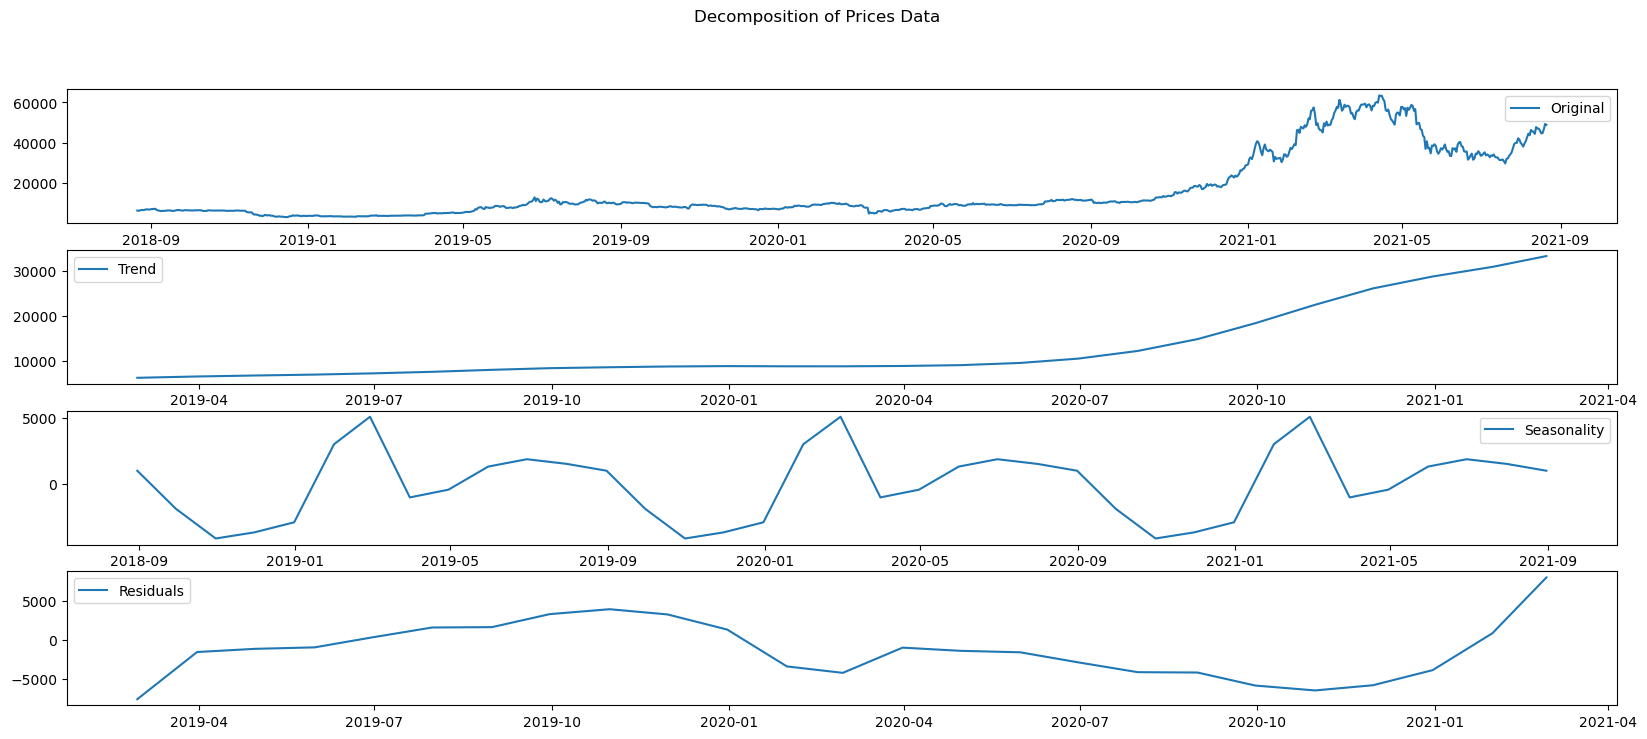

In [265]:
decomposition = sm.tsa.seasonal_decompose(df_month['Adj Close'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(df['Adj Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [266]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month['Adj Close'])[1])

Dickey–Fuller test: p=1.000000


The series is clearly not stationary here.

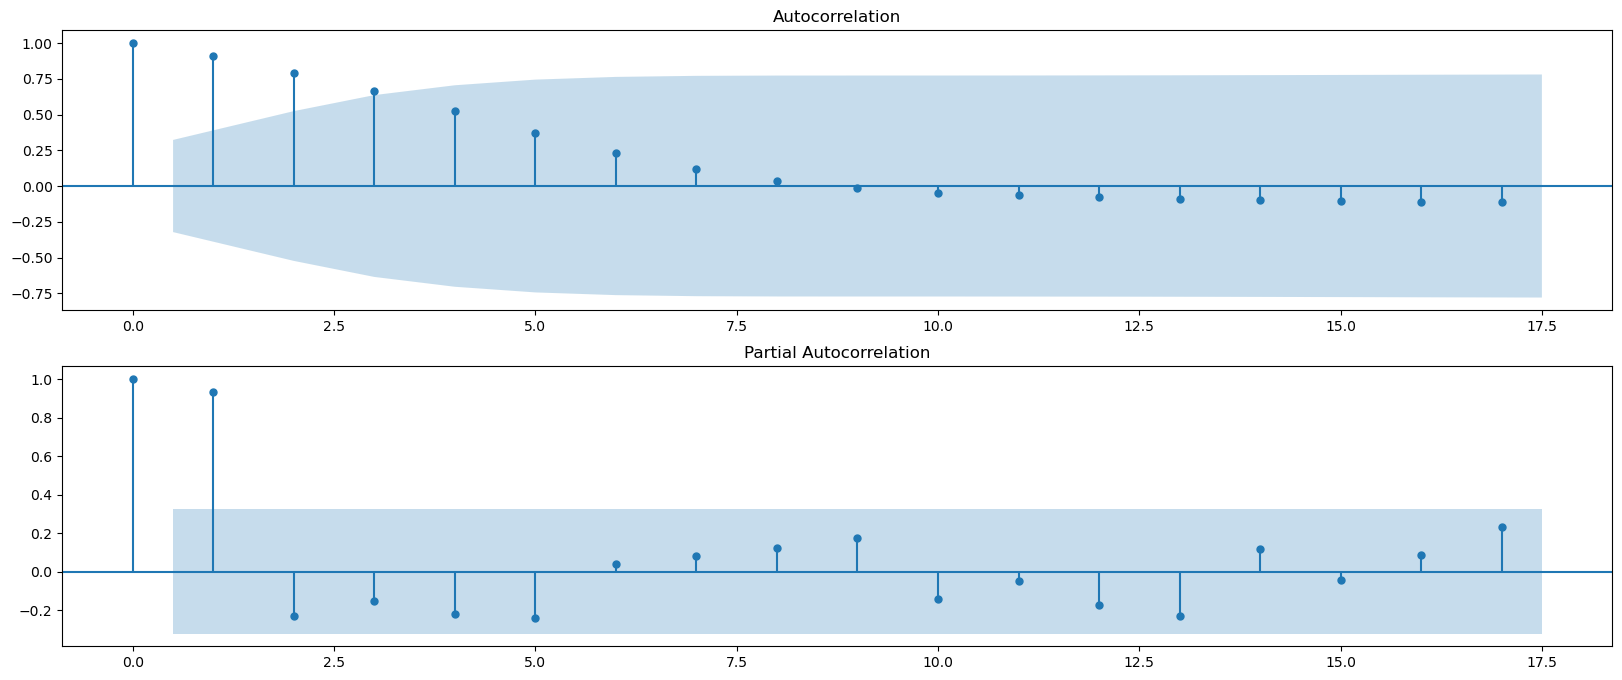

In [267]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(df_month['Adj Close'], ax=pyplot.gca(),lags=17)
pyplot.subplot(212)
plot_pacf(df_month['Adj Close'], ax=pyplot.gca(), lags=17)
pyplot.show()

In [268]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 2)
Ps = range(0, 2)
ps = range(0, 2)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month['Adj Close'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [269]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
13  (1, 1, 0, 1)  205.149453
5   (0, 1, 0, 1)  205.177054
15  (1, 1, 1, 1)  205.992654
7   (0, 1, 1, 1)  206.978112
14  (1, 1, 1, 0)  225.006291
                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                   37
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -98.575
Date:                            Mon, 30 Aug 2021   AIC                            205.149
Time:                                    19:11:54   BIC                            206.360
Sample:                                08-31-2018   HQIC                           203.822
                                     - 08-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

## Analysis of Residues 

Dickey–Fuller test:: p=0.000061


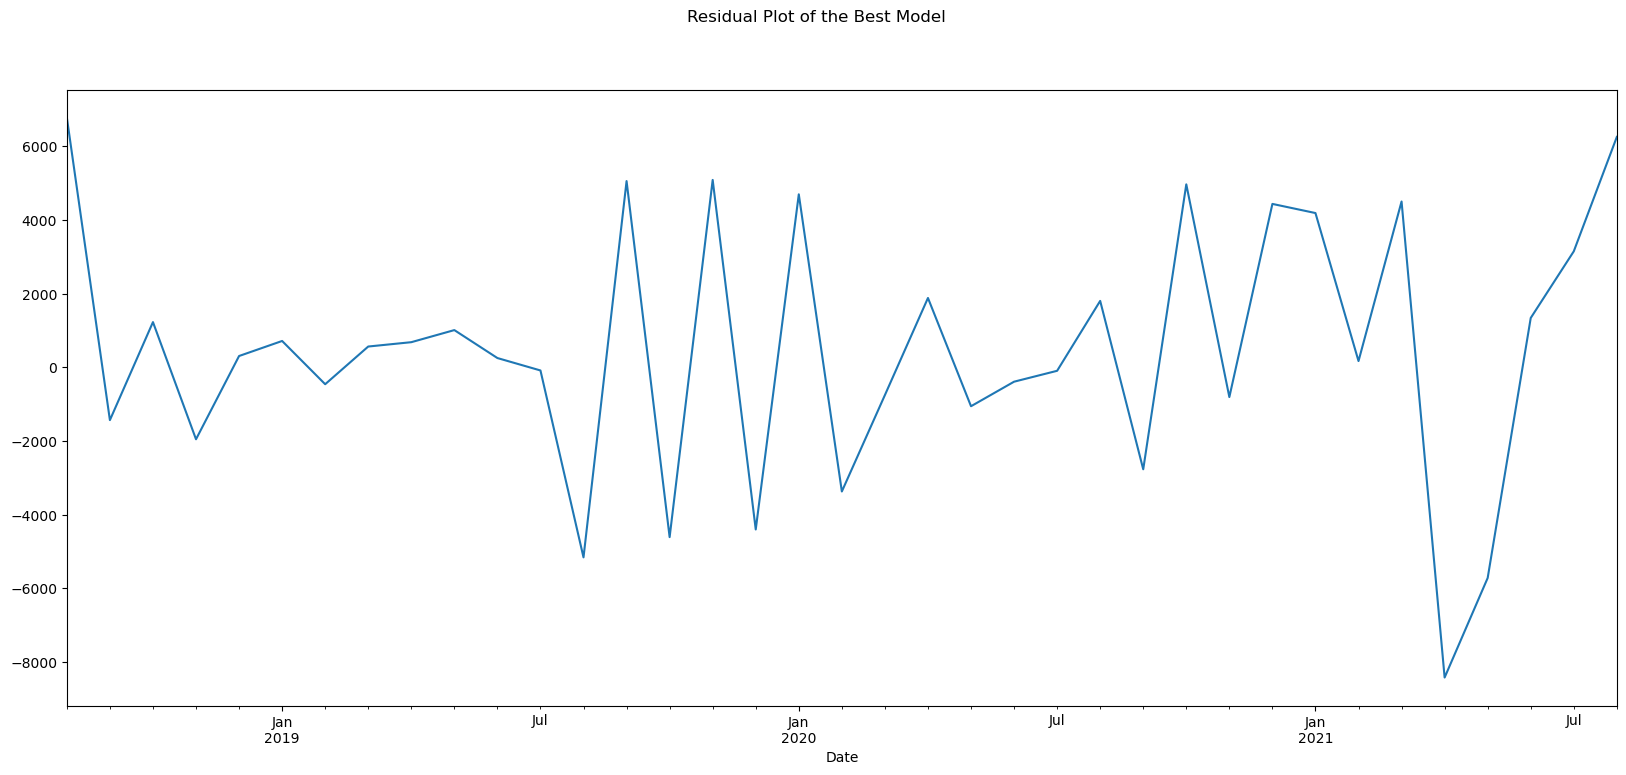

In [270]:
fig = plt.figure(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])
plt.show()

## Predictions 

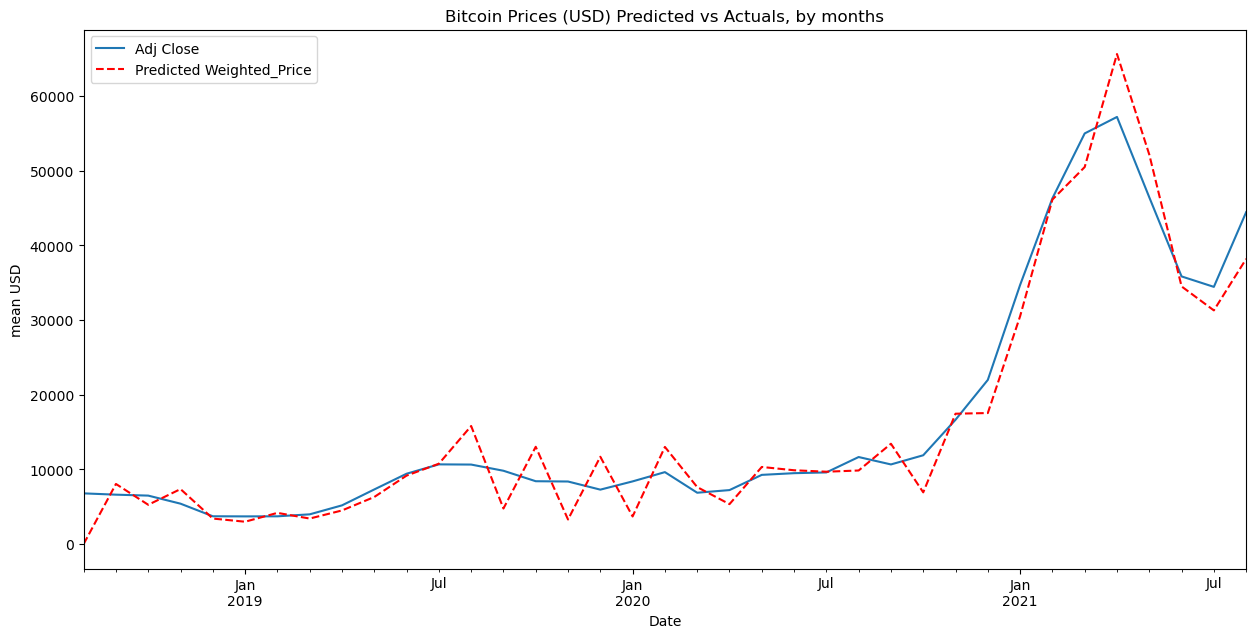

In [272]:
df_month2 = df_month[['Adj Close']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['Forecast'] = best_model.predict(start=0, end=200)
plt.figure(figsize=(15,7))
df_month2['Adj Close'].plot()
df_month2['Forecast'].plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Prices (USD) Predicted vs Actuals, by months')
plt.ylabel('mean USD')
plt.show()

## Model Evaluation 

In [277]:
from sklearn.metrics import mean_squared_error

In [278]:
rmse = mean_squared_error(df_month2['Adj Close'], df_month2['Forecast'], squared = False)

In [279]:
rmse

3534.9771641553198

The prediction is not the best. Bitcoin prices are potentially influenced by external factors such as rumours/mentions on social media. We will try to account for this by including time series data for the number of bitcoin tweets in order to achieve a higher accuracy. In the next section, we will also be training an LSTM (Long-Short Term Memory) model to contrast with our current ARIMA model. 